<a href="https://colab.research.google.com/github/Aquib88raza/image-classification-ANKLE/blob/main/Copy_of_cnn_for_knee98_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

In [2]:

normal_path = "/content/drive/MyDrive/knee osteo/healthy"
ill_path = "/content/drive/MyDrive/knee osteo/ill"

main_folders = [normal_path, ill_path]

images = []
labels = []

# Resizing function
def resize_image(img):
    resized_img = cv2.resize(img, (64, 64))  # Resizing to a common shape
    return resized_img

for idx, folder in enumerate(main_folders):
    if os.path.exists(folder):
        image_files = [file for file in os.listdir(folder) if file.endswith('.jpg')]
        if image_files:
            for image_file in image_files:
                image_path = os.path.join(folder, image_file)
                image = cv2.imread(image_path)
                if image is not None:
                    image = resize_image(image)  # Resize the image
                    images.append(image)
                    labels.append(idx)
                else:
                    print(f"Error loading image: {image_path}")
        else:
            print(f"No JPG images found in: {folder}")
    else:
        print(f"Directory does not exist: {folder}")

if images:
    images = np.array(images)
    labels = np.array(labels)

    # Normalize pixel values to be between 0 and 1
    images = images.astype('float32') / 255.0

    print(f"Total number of images: {len(images)}")

    X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)
    print(f"Number of training images: {len(X_train)}")
    print(f"Number of testing images: {len(X_test)}")


Total number of images: 603
Number of training images: 482
Number of testing images: 121


In [3]:
# Define the model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Assuming binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

model.summary()

Epoch 1/50
16/16 [==============================] - 4s 193ms/step - loss: 0.7181 - accuracy: 0.5353 - val_loss: 0.6926 - val_accuracy: 0.4711
Epoch 2/50
16/16 [==============================] - 3s 181ms/step - loss: 0.6942 - accuracy: 0.5353 - val_loss: 0.6945 - val_accuracy: 0.4711
Epoch 3/50
16/16 [==============================] - 3s 209ms/step - loss: 0.6881 - accuracy: 0.5581 - val_loss: 0.6905 - val_accuracy: 0.4711
Epoch 4/50
16/16 [==============================] - 4s 250ms/step - loss: 0.6809 - accuracy: 0.5705 - val_loss: 0.6691 - val_accuracy: 0.6860
Epoch 5/50
16/16 [==============================] - 3s 166ms/step - loss: 0.6471 - accuracy: 0.6701 - val_loss: 0.6831 - val_accuracy: 0.5041
Epoch 6/50
16/16 [==============================] - 2s 148ms/step - loss: 0.6225 - accuracy: 0.6494 - val_loss: 0.6879 - val_accuracy: 0.5207
Epoch 7/50
16/16 [==============================] - 3s 159ms/step - loss: 0.5750 - accuracy: 0.6909 - val_loss: 0.5854 - val_accuracy: 0.6281
Epoch 

4/4 [==============================] - 0s 39ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        64
           1       1.00      0.95      0.97        57

    accuracy                           0.98       121
   macro avg       0.98      0.97      0.98       121
weighted avg       0.98      0.98      0.98       121



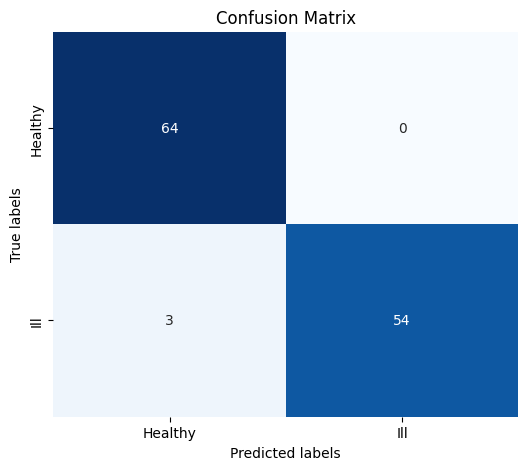

In [4]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Predict labels on the test set
y_pred = model.predict(X_test)
y_pred = np.round(y_pred).flatten()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display Confusion Matrix using Seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False,
            xticklabels=['Healthy', 'Ill'], yticklabels=['Healthy', 'Ill'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


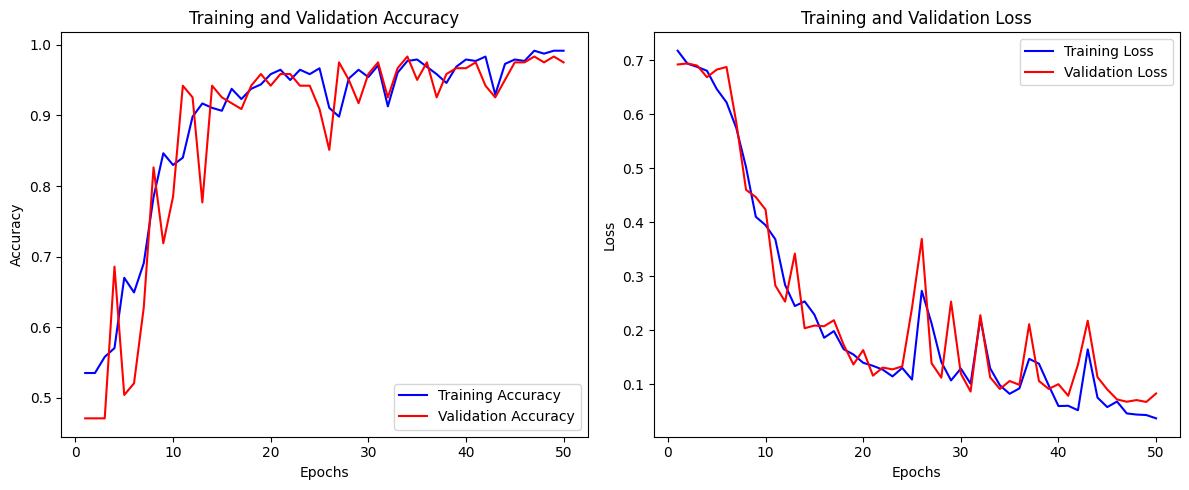

In [5]:
# Extracting training and validation accuracy and loss from history
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_acc) + 1)

# Plotting the training and validation accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting the training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

16/16 [==============================] - 1s 38ms/step
Classification Report - Training Data:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       238
           1       1.00      0.95      0.97       244

    accuracy                           0.98       482
   macro avg       0.98      0.98      0.98       482
weighted avg       0.98      0.98      0.98       482



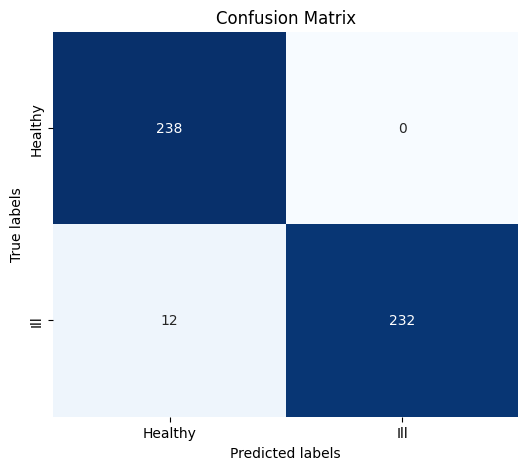

In [6]:
# Predict labels on the training set
y_train_pred = model.predict(X_train)
y_train_pred = np.round(y_train_pred).flatten()

# Classification Report for training data
print("Classification Report - Training Data:")
print(classification_report(y_train, y_train_pred))
# Confusion Matrix
conf_matrix = confusion_matrix(y_train, y_train_pred)

# Display Confusion Matrix using Seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False,
            xticklabels=['Healthy', 'Ill'], yticklabels=['Healthy', 'Ill'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

4/4 [==============================] - 0s 43ms/step


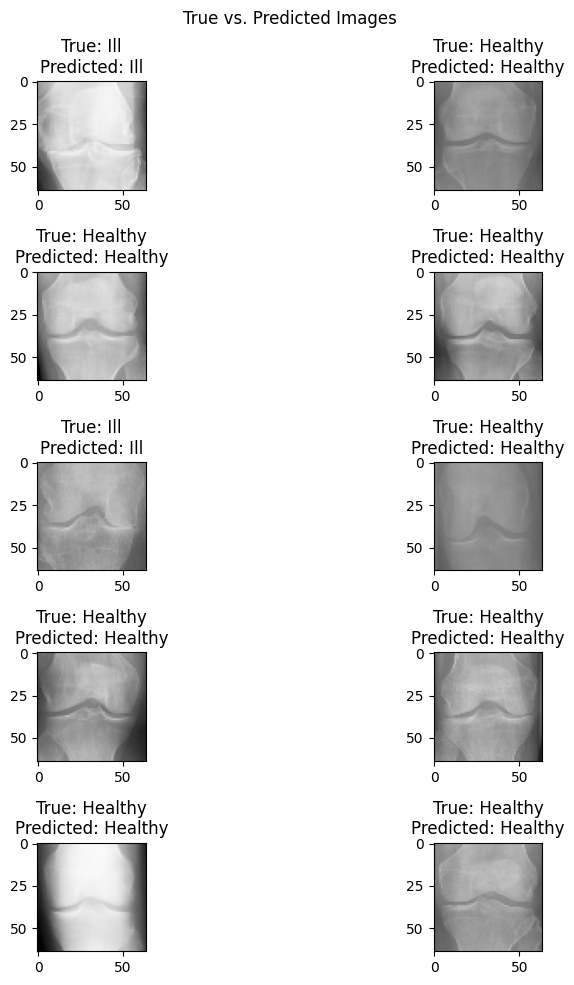

In [7]:
import random

# Predict labels on the test set
y_pred = model.predict(X_test)
y_pred = np.round(y_pred).flatten()

# Randomly select some images for display (e.g., 10 images)
num_samples_to_display = 10
random_indices = random.sample(range(len(X_test)), num_samples_to_display)

# Create a figure to display the images
plt.figure(figsize=(10, 10))
plt.suptitle("True vs. Predicted Images")

# Define the number of rows and columns for image display
num_rows = 5
num_cols = 2

for i, index in enumerate(random_indices):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(X_test[index])  # Display the image
    true_label = "Healthy" if y_test[index] == 0 else "Ill"
    predicted_label = "Healthy" if y_pred[index] == 0 else "Ill"  # Use y_pred instead of y_test_pred
    plt.title(f"True: {true_label}\nPredicted: {predicted_label}")

plt.tight_layout()
plt.show()
